In [1]:
# Import the requred libraries
import yfinance as yf
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:284: DeprecationWarning: `n

In [6]:
# Functions

def add_currency(coins, currency):
    '''
    Transforms crypto currencies tickers to yahoo finance tickers.
    Takes in list of crypto currency and append to their name fiat currency(USD,EUR,etc).
    
    BTC --------> BTC-USD
    
    >>> add_currency('BTC')
    'BTC-USD'
    '''
    
    # Placeholder for the results
    coin_curr_pairs = []
    
    # Appends currency to the coins tickers
    for coin_name in coins:
        new_name = f'{coin_name}-{currency}'
        coin_curr_pairs.append(new_name)
    
    # Returns the results in form of a list
    return coin_curr_pairs

def get_port_data(tickers, period = '3y'):
    '''
    Get the closing prices from YF for list of tickers.
    Takes as input list of Yahoo Finance tickers and period value.
    Default period values is 3y. Since the function is using YF API
    the period abreviations listed in the documentation can be applied here as well.
    Return dataframe with all assets closing prices over the given period.
    '''
    
    # Define empty dataset
    assets_data = pd.DataFrame()
    
    # Loop though the assets
    for i, asset in enumerate(tickers):
        asset_data = yf.Ticker(asset)
        asset_price_hist = asset_data.history(period = period)['Close']
        asset_price_hist.name = asset
        # The dataset acquires the index of the first asset
        if i == 0:
            assets_data.index = asset_price_hist.index
            assets_data[asset] = asset_price_hist
        # Use the date index to join the next assets iniformation
        else:
            assets_data = assets_data.merge(asset_price_hist, left_index = True, 
                                              right_index = True, how = 'left')


    return assets_data
    

In [112]:
a=yf.Ticker('BTC-USD')


In [114]:
print(a.get_info())

{'companyOfficers': [], 'name': 'Bitcoin', 'startDate': 1367107200, 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,903,512. The last known price of Bitcoin is 47,090.57041302 USD and is down -1.95 over the last 24 hours. It is currently trading on 8198 active market(s) with $31,437,091,906.25 traded over the last 24 hours. More information can be found at https://bitcoin.org/.', 'maxAge': 1, 'exchange': 'CCC', 'shortName': 'Bitcoin USD', 'exchangeTimezoneName': 'UTC', 'exchangeTimezoneShortName': 'UTC', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '0', 'quoteType': 'CRYPTOCURRENCY', 'symbol': 'BTC-USD', 'messageBoardId': 'finmb_BTC_CCC', 'market': 'ccc_market', 'previousClose': 36781.855, 'regularMarketOpen': 36781.855, 'twoHundredDayAverage': 48748.35, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': 31905079296, 'regularMarketDayHigh': 37052.676, 'navPrice

In [137]:
# Provide a list of tickers
coin_names = ['BTC','ETH','ADA','SOL','BNB',
           'XRP','LUNA','DOT', 'AVAX', 'MATIC']
coin_names = ['BTC','ETH','ADA', 'BNB', 'DOGE',
           'XRP','LUNA', 'LINK', 'LTC','TRX']

currency = 'USD'
coin_tickers = add_currency(coin_names, currency) 
print(coin_tickers)


['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'DOGE-USD', 'XRP-USD', 'LUNA-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD']


In [138]:
# Get the data
crypto_data = get_port_data(coin_tickers, period = '4y')
print(crypto_data)


                 BTC-USD      ETH-USD   ADA-USD     BNB-USD  DOGE-USD  \
Date                                                                    
2018-01-27  11440.700195  1107.069946  0.616833   13.253000  0.007373   
2018-01-28  11786.299805  1246.010010  0.670286   13.540200  0.007465   
2018-01-29  11296.400391  1182.359985  0.623204   12.764500  0.006967   
2018-01-30  10106.299805  1071.130005  0.531913   11.250700  0.006024   
2018-01-31  10221.099609  1118.310059  0.519315   11.145000  0.006010   
...                  ...          ...       ...         ...       ...   
2022-01-23  36276.804688  2535.039062  1.122371  383.933960  0.141863   
2022-01-24  36654.328125  2440.352295  1.066598  371.368958  0.137798   
2022-01-25  36954.003906  2455.935059  1.043574  384.619354  0.143049   
2022-01-26  36852.121094  2468.030273  1.079047  375.755463  0.143789   
2022-01-27  36966.371094  2500.871338  1.068714  376.241272  0.144824   

             XRP-USD  LUNA-USD   LINK-USD     LTC-

In [139]:
# Check for NAs
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2018-01-27 to 2022-01-27
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC-USD   1462 non-null   float64
 1   ETH-USD   1462 non-null   float64
 2   ADA-USD   1462 non-null   float64
 3   BNB-USD   1462 non-null   float64
 4   DOGE-USD  1462 non-null   float64
 5   XRP-USD   1462 non-null   float64
 6   LUNA-USD  1461 non-null   float64
 7   LINK-USD  1462 non-null   float64
 8   LTC-USD   1462 non-null   float64
 9   TRX-USD   1462 non-null   float64
dtypes: float64(10)
memory usage: 157.9 KB


In [140]:
# Drop NAs
# Small amount, so can just be dropped
crypto_data.dropna(inplace=True)

In [141]:
# Get returns
crypto_data_ret = crypto_data.pct_change(1)[1:]

# Get norm returns
crypto_data_norm_ret = crypto_data/crypto_data.iloc[0]

# Get log returns
crypto_data_log_ret = np.log(crypto_data/crypto_data.shift(1))[1:]
print(crypto_data_log_ret)

             BTC-USD   ETH-USD   ADA-USD   BNB-USD  DOGE-USD   XRP-USD  \
Date                                                                     
2018-01-28  0.029761  0.118230  0.083106  0.021439  0.012401  0.138065   
2018-01-29 -0.042454 -0.052434 -0.072831 -0.058995 -0.069041 -0.055552   
2018-01-30 -0.111325 -0.098798 -0.158394 -0.126238 -0.145433 -0.150870   
2018-01-31  0.011295  0.043104 -0.023969 -0.009439 -0.002327  0.020714   
2018-02-01 -0.108458 -0.075689 -0.208283 -0.158033 -0.178204 -0.188668   
...              ...       ...       ...       ...       ...       ...   
2022-01-22 -0.039930 -0.061574 -0.051626 -0.067426 -0.070787 -0.064475   
2022-01-23  0.034967  0.052584  0.050859  0.069669  0.065325  0.053432   
2022-01-24  0.010353 -0.038067 -0.050969 -0.033274 -0.029073 -0.026784   
2022-01-25  0.008142  0.006365 -0.021823  0.035058  0.037398  0.008822   
2022-01-26 -0.002761  0.004913  0.033427 -0.023316  0.005160  0.007275   

            LUNA-USD  LINK-USD   LTC-

In [142]:
print(crypto_data_norm_ret)

             BTC-USD   ETH-USD   ADA-USD    BNB-USD   DOGE-USD   XRP-USD  \
Date                                                                       
2018-01-27  1.000000  1.000000  1.000000   1.000000   1.000000  1.000000   
2018-01-28  1.030208  1.125503  1.086657   1.021671   1.012478  1.148051   
2018-01-29  0.987387  1.068008  1.010329   0.963140   0.944934  1.086014   
2018-01-30  0.883364  0.967536  0.862329   0.848917   0.817035  0.933927   
2018-01-31  0.893398  1.010153  0.841905   0.840942   0.815136  0.953474   
...              ...       ...       ...        ...        ...       ...   
2022-01-22  3.061897  2.172565  1.729343  27.020007  18.024142  0.488916   
2022-01-23  3.170855  2.289864  1.819570  28.969588  19.240879  0.515750   
2022-01-24  3.203854  2.204334  1.729152  28.021501  18.689542  0.502120   
2022-01-25  3.230047  2.218410  1.691826  29.021304  19.401736  0.506569   
2022-01-26  3.221142  2.229335  1.749334  28.352483  19.502101  0.510267   

           

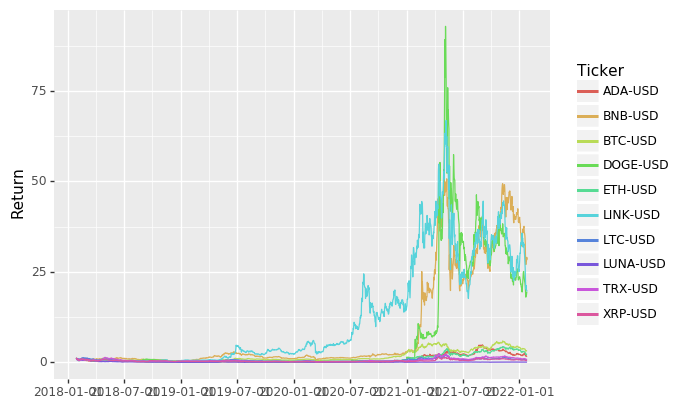

<ggplot: (-9223371899765277192)>

In [175]:
# Plot data
crypto_data_norm_ret_plot = pd.melt(crypto_data_norm_ret, var_name='Ticker', value_name='Return', ignore_index = False)
(
    ggplot(crypto_data_norm_ret_plot, aes(x = crypto_data_norm_ret_plot.index, 
                                          y = crypto_data_norm_ret_plot['Return'], 
                                          color = crypto_data_norm_ret_plot['Ticker']))
    + geom_line()
)
# GO DOGE !!!

In [144]:
print(crypto_data_ret)

             BTC-USD   ETH-USD   ADA-USD   BNB-USD  DOGE-USD   XRP-USD  \
Date                                                                     
2018-01-28  0.030208  0.125503  0.086657  0.021671  0.012478  0.148051   
2018-01-29 -0.041565 -0.051083 -0.070242 -0.057289 -0.066711 -0.054037   
2018-01-30 -0.105352 -0.094075 -0.146487 -0.118595 -0.135352 -0.140041   
2018-01-31  0.011359  0.044047 -0.023684 -0.009395 -0.002324  0.020930   
2018-02-01 -0.102783 -0.072896 -0.188023 -0.146179 -0.163228 -0.171939   
...              ...       ...       ...       ...       ...       ...   
2022-01-22 -0.039143 -0.059716 -0.050316 -0.065203 -0.068340 -0.062441   
2022-01-23  0.035585  0.053991  0.052174  0.072153  0.067506  0.054885   
2022-01-24  0.010407 -0.037351 -0.049692 -0.032727 -0.028654 -0.026428   
2022-01-25  0.008176  0.006385 -0.021586  0.035680  0.038107  0.008861   
2022-01-26 -0.002757  0.004925  0.033992 -0.023046  0.005173  0.007301   

            LUNA-USD  LINK-USD   LTC-

In [145]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(crypto_data_log_ret.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(10))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(crypto_data_log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(crypto_data_log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'DOGE-USD', 'XRP-USD',
       'LUNA-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895]


Rebalance to sum to 1.0
[0.10499539 0.11602948 0.00578945 0.03487419 0.13933214 0.16954988
 0.0624131  0.18169153 0.14670601 0.03861884]


Expected Portfolio Return
0.15772890794261377


Expected Volatility
0.8078691924843338


Sharpe Ratio
0.19524065208820604


In [158]:
# Set seed (optional)
np.random.seed(101)

num_ports = 5000

all_weights = np.zeros((num_ports,len(crypto_data_log_ret.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(10))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((crypto_data_log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(crypto_data_log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [159]:
sharpe_arr.max()

0.5347692086752317

In [160]:
sharpe_arr.argmax()

306305

In [161]:
all_weights[sharpe_arr.argmax(),:]

array([0.14199968, 0.00065442, 0.05265482, 0.31247185, 0.07438131,
       0.00348804, 0.0126673 , 0.3618464 , 0.01990761, 0.01992858])

In [162]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

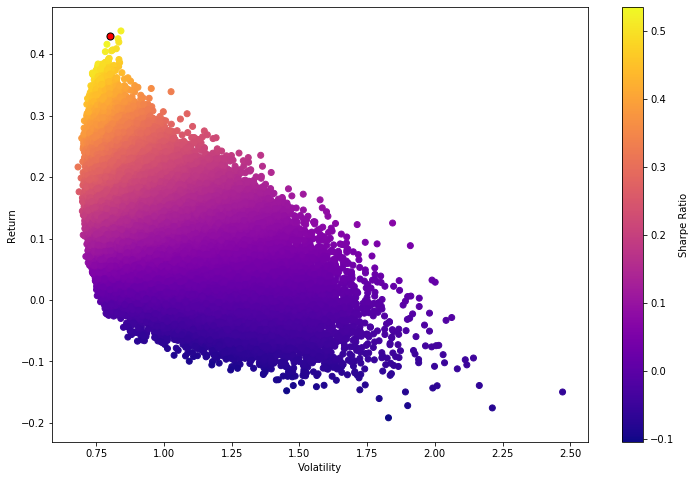

In [163]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')